In [16]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
csv_file = "enron_emails.csv"
with open(csv_file, "w", newline="", encoding="utf-8") as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["filepath", "email"])

In [10]:
root_dir = "/Users/dineshpasupuleti/Downloads/maildir"  # Replace with the path to your Enron maildir folder
for root, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith("."):  # Assuming the email files have a .txt extension
            email_file_path = os.path.join(root, file)
            relative_path = os.path.relpath(email_file_path, root_dir)
            with open(email_file_path, "r", encoding="utf-8", errors="ignore") as email_file:
                email_text = email_file.read()
                csv_row = [relative_path, email_text]
                with open(csv_file, "a", newline="", encoding="utf-8") as csvfile:
                    csv_writer = csv.writer(csvfile)
                    csv_writer.writerow(csv_row)

In [11]:
df = pd.read_csv("/Users/dineshpasupuleti/Downloads/enron_emails.csv")
df

,filepath,email
0,arnold-j/notes_inbox/36.,Message-ID: <17334447.1075857585446.JavaMail.e...
1,arnold-j/notes_inbox/19.,Message-ID: <19171686.1075857585034.JavaMail.e...
2,arnold-j/notes_inbox/50.,Message-ID: <29887033.1075857630725.JavaMail.e...
3,arnold-j/notes_inbox/3.,Message-ID: <29084893.1075849630138.JavaMail.e...
4,arnold-j/notes_inbox/9.,Message-ID: <30248874.1075857584813.JavaMail.e...
...,...,...
517396,scholtes-d/stf/current_issues/12.,Message-ID: <18618854.1075840028791.JavaMail.e...
517397,scholtes-d/stf/current_issues/8.,Message-ID: <14350892.1075840028690.JavaMail.e...
517398,scholtes-d/stf/e_tag/3.,Message-ID: <21704474.1075840029683.JavaMail.e...
517399,scholtes-d/stf/e_tag/1.,Message-ID: <9367927.1075840029633.JavaMail.ev...


In [12]:
df['sender'] = df['filepath'].str.split('/').str[0]
df['sender']

0           arnold-j
1           arnold-j
2           arnold-j
3           arnold-j
4           arnold-j
             ...    
517396    scholtes-d
517397    scholtes-d
517398    scholtes-d
517399    scholtes-d
517400    scholtes-d
Name: sender, Length: 517401, dtype: object

In [18]:
sender = df.groupby('sender').sender.count()
percent_sender = (sender / len(df)) * 100
percent_sender
sender

sender
allen-p        3034
arnold-j       4898
arora-h         654
badeer-r        877
bailey-s        478
               ... 
williams-w3    3440
wolfe-j        1587
ybarbo-p       1291
zipper-a       1563
zufferli-j      557
Name: sender, Length: 150, dtype: int64

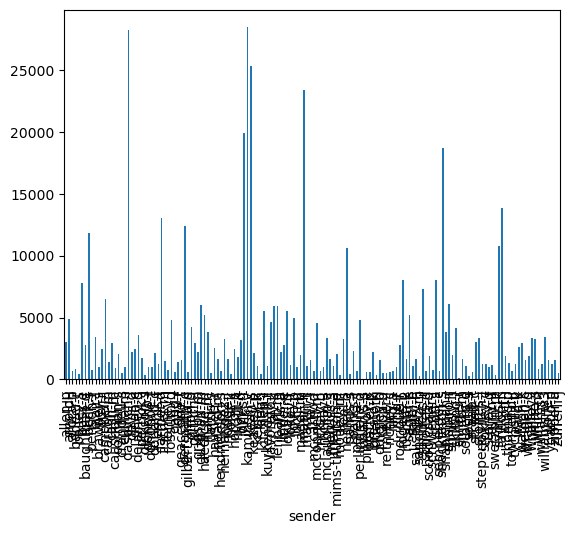

In [17]:
df.groupby('sender').sender.count().plot.bar(ylim=0)
plt.show()